In [354]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Set Seaborn styles
sb.set()

# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [355]:
path = 'C:/Loan/Dataset/train_u6lujuX_CVtuZ9i.csv'

In [356]:
loan_train = pd.read_csv(path)
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [357]:
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


Exploratory Data Analysis

In [358]:
# TODO : Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [359]:
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


Let's check the dataset is Balanced or Imbalanced

In [360]:
loan_train['Loan_Status'].isnull().sum()

0

In [361]:
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

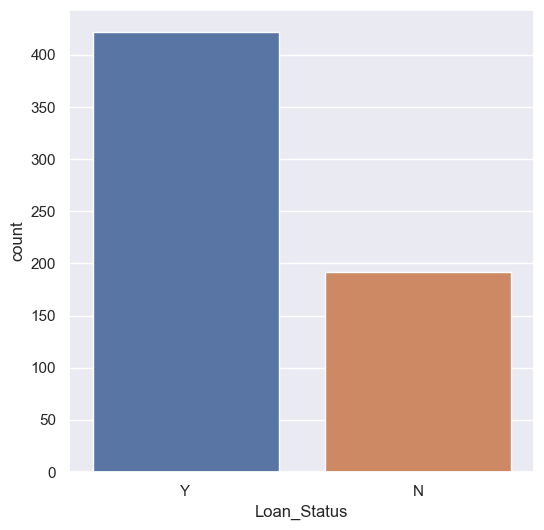

In [362]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)

In [363]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [364]:
loan_train.shape

(614, 13)

#Feature Engineering

1. Loan_ID

In [365]:
loan_train['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

2. Gender

In [366]:
loan_train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [367]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())

Number of null values :  13
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot: xlabel='Gender', ylabel='count'>

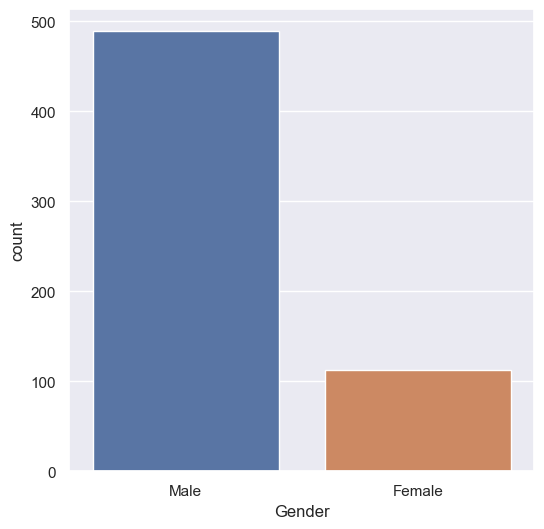

In [368]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)

In [369]:
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


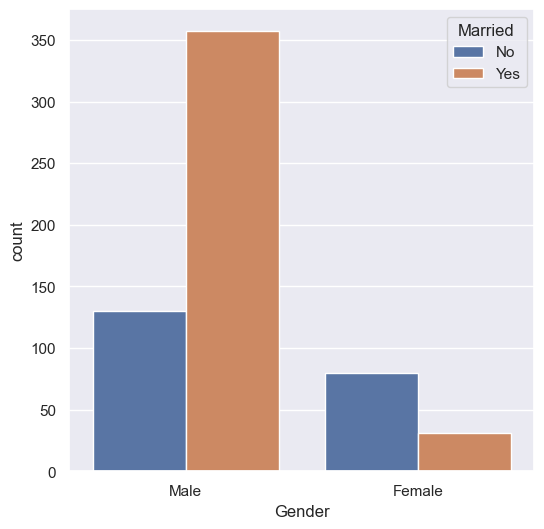

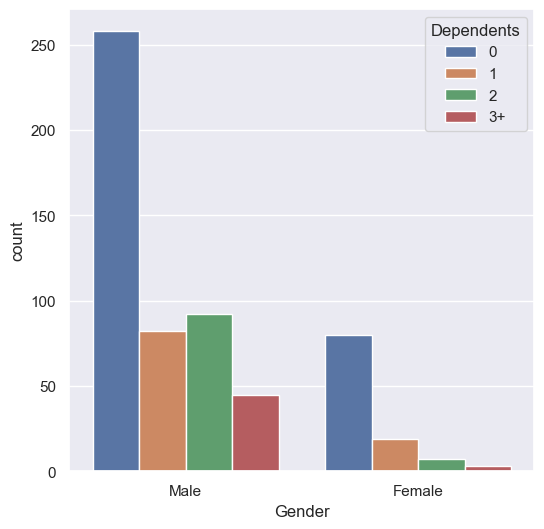

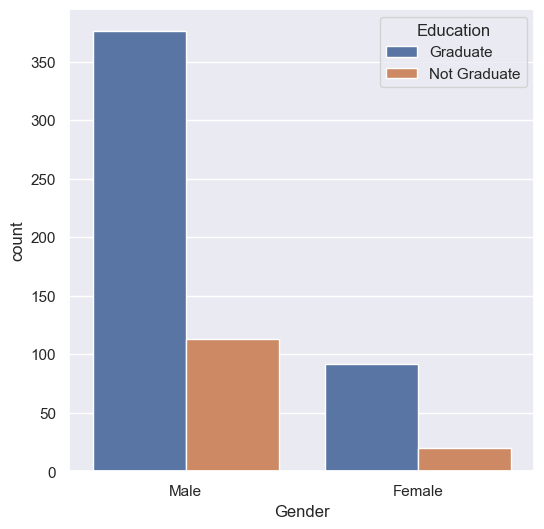

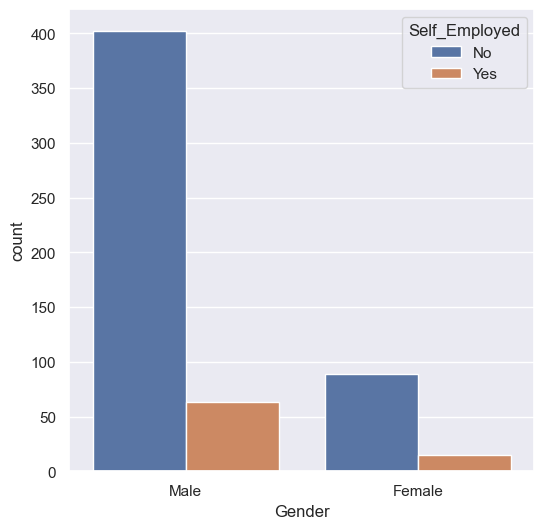

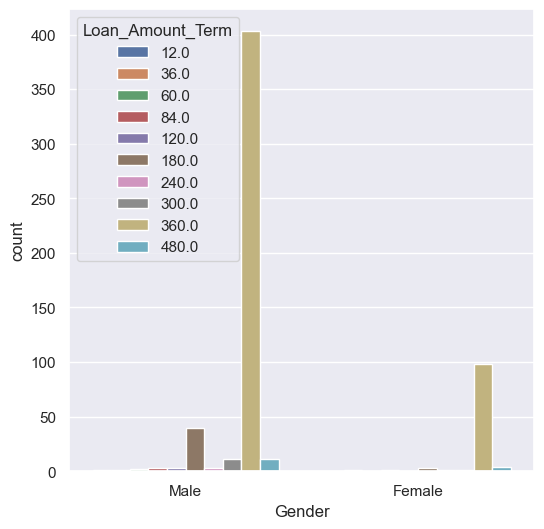

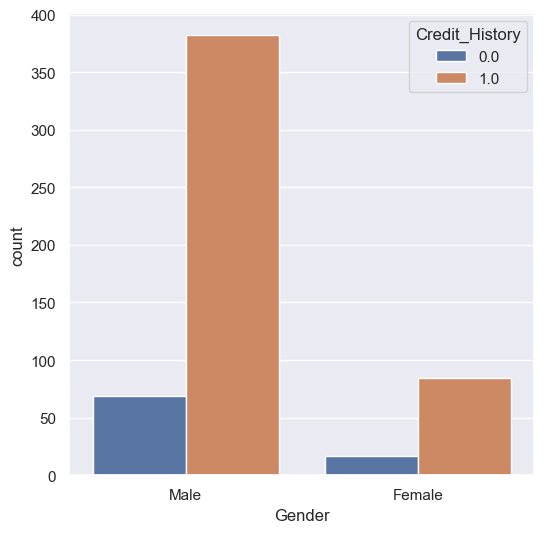

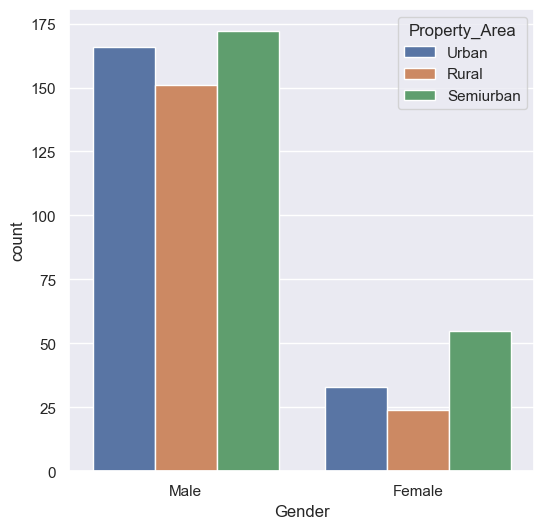

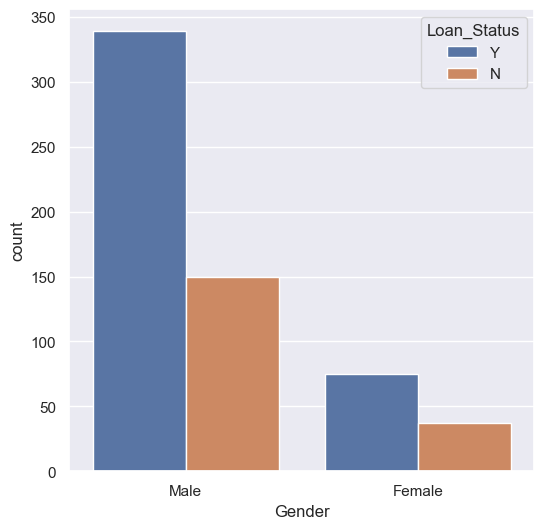

In [370]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Married')
# plt.savefig('../images/gender_counts_1.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/gender_counts_2.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Education')
# plt.savefig('../images/gender_counts_3.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/gender_counts_4.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/gender_counts_5.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/gender_counts_6.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/gender_counts_7.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/gender_counts_8.png')
plt.show()

- Most of these people are married. So we can't fill Gender based on Married column.
- Most of these people are graduated. So we can't fill Gender based on Education column.
- Most of these people are self employed. So we can't fill Gender based on Self_Employed column.
- Most of these people are having Credit_History and Loan_Amount_Term as 360 days(1 year).
- Since we are going to predict applicant's Gender, we can omit CoapplicantIncome
- So we are going predict the Gender based on Dependents, ApplicantIncome, LoanAmount, and Property_Area

In [371]:
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  601
Number of Samples After dropping samples having null values in predictor columns for Gender column:  566


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [372]:
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0].item()]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3].item()]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [373]:
# loan_train = gender_null_value_filler(loan_train, Gender_predictor)

In [374]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [375]:
print(loan_train['Gender'].apply(type).unique())  # ตรวจสอบประเภทข้อมูลที่ไม่ซ้ำกันในคอลัมน์ 'Gender'

[<class 'str'> <class 'float'>]


In [376]:
def gender_mapper(x):
    if isinstance(x, str):
        return {'Male': 1, 'Female': 0}[x]
    else:
        # แทนที่ค่าที่ไม่ใช่สายอักขระด้วยค่าตัวเลขที่เหมาะสม
        return 0  # สามารถเปลี่ยนเป็น 1 หรือค่าอื่น ๆ ที่คุณต้องการ

loan_train['Gender'] = loan_train.Gender.apply(gender_mapper)

In [377]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


3. Married

In [378]:
loan_train['Married'].describe()


count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [379]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  3
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot: xlabel='Married', ylabel='count'>

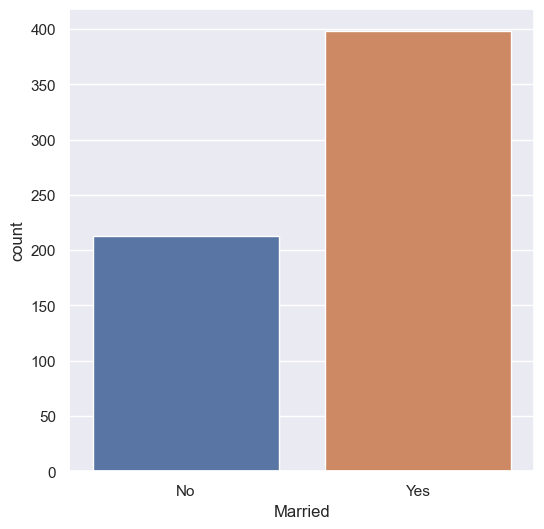

In [380]:
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)

In [381]:
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


Drop the samples having yes value on Loan_Status on the above samples listed


In [382]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,398,398.000000,398,390,398,380,398.000000,398.000000,384.000000,389.000000,362.000000,398,398
unique,398,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,398,174,309,326,NaN,NaN,NaN,NaN,NaN,151,285
mean,NaN,0.896985,NaN,NaN,NaN,NaN,5629.173367,1794.632965,155.750000,336.987147,0.842541,NaN,NaN
std,NaN,0.304361,NaN,NaN,NaN,NaN,6989.254425,2039.962354,89.934267,66.739163,0.364737,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2817.500000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3854.500000,1625.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5820.500000,2464.000000,178.500000,360.000000,1.000000,NaN,NaN


มีผู้สมัครที่แต่งงานแล้ว 398 คน ในจำนวนนี้ 309 คนจบการศึกษาแล้ว 326 คนไม่ได้ประกอบอาชีพอิสระ และ 151 คนเป็นชาวเมือง

จากนี้ เราสามารถสรุปได้ว่าตัวอย่างที่ขาดหายไปทั้งหมดเป็น Married

In [383]:
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [384]:
loan_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [385]:
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

4. Dependents

In [386]:
loan_train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [387]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  15
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


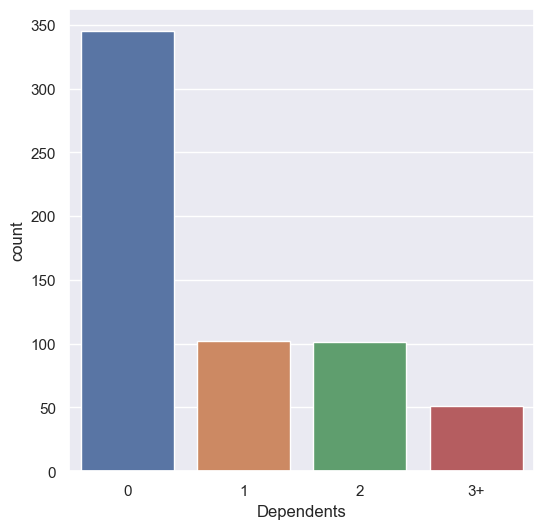

In [388]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
# plt.savefig('../images/dependents_counts_0.png')
plt.show()

In [389]:
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,0,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,1,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,1,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,1,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,1,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [390]:
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [391]:
loan_train = dependents_null_value_filler(loan_train)


In [392]:
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

5. Education


In [393]:
loan_train['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [394]:
loan_train['Education'].isnull().sum()

0

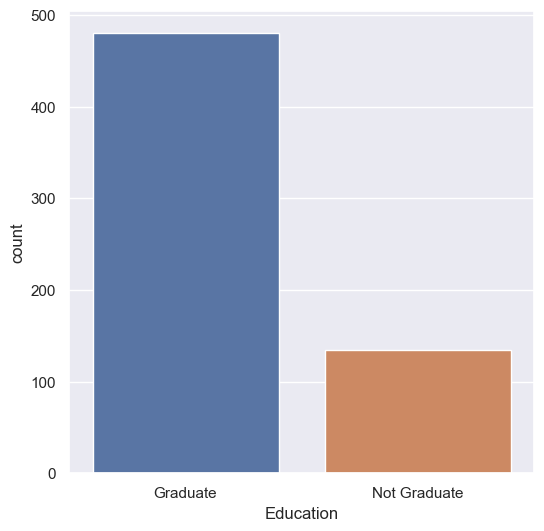

In [395]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
# plt.savefig('../images/education_counts_0.png')
plt.show()

In [396]:
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

6. Self_Employed

In [397]:
loan_train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [398]:
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  32
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     500
Yes     82
Name: Self_Employed, dtype: int64


In [399]:
count_no = (loan_train['Self_Employed'] == 'No').sum()
count_yes = (loan_train['Self_Employed'] == 'Yes').sum()

In [400]:
percent_no = (count_no*100)/loan_train.shape[0]
print(f'Percent no self employed: {percent_no}')

Percent no self employed: 81.43322475570032


In [401]:
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

7. Applicant Income


In [402]:
loan_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [403]:
loan_train['ApplicantIncome'].isnull().sum()

0

c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='ApplicantIncome', ylabel='Density'>

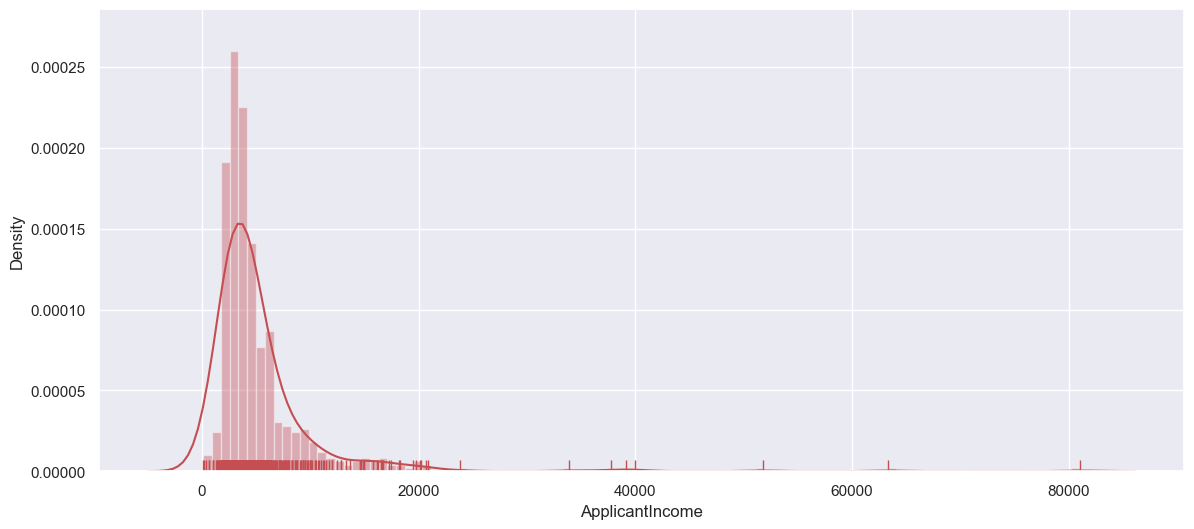

In [404]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')

จาก distplot ข้างต้น ผู้สมัครส่วนใหญ่มีรายได้น้อยกว่า 10,000 รูปี และผู้สมัครจำนวนหนึ่งมีรายได้ระหว่าง 10,000 ถึง 20,000 รูปี

In [405]:
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001448,0,1,3,1,0,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,1,0,0,1,1,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,0,1,3,1,0,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
284,LP001922,1,1,0,1,0,20667,0.0,NaN,360.0,1.0,Rural,N
308,LP001996,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N


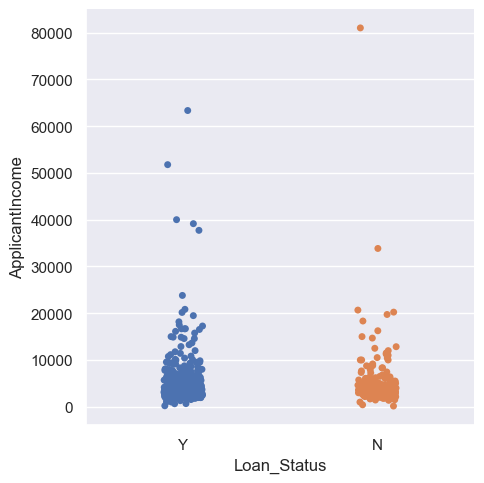

In [406]:
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

จากโครงเรื่องตามหมวดหมู่ด้านบน รายได้ของผู้สมัครไม่สามารถแยกความแตกต่างของ Loan_Status ได้ เพื่อความแม่นยำยิ่งขึ้น เราอาจทิ้งคอลัมน์รายได้ของผู้สมัคร

8. Co-applicant Income

In [407]:
loan_train['CoapplicantIncome'].describe()


count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [408]:
loan_train['CoapplicantIncome'].isnull().sum()


0

c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Density'>

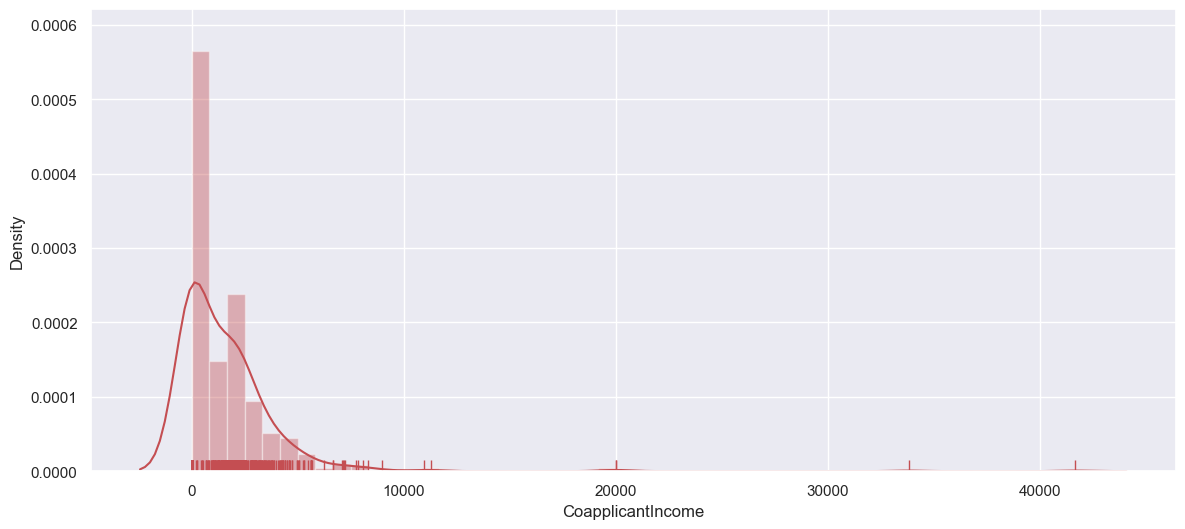

In [409]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')

In [410]:
loan_train['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

9. LoanAmount

In [411]:
loan_train['LoanAmount'].describe()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\tam05\anaconda3\envs\AI4H\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='LoanAmount', ylabel='Density'>

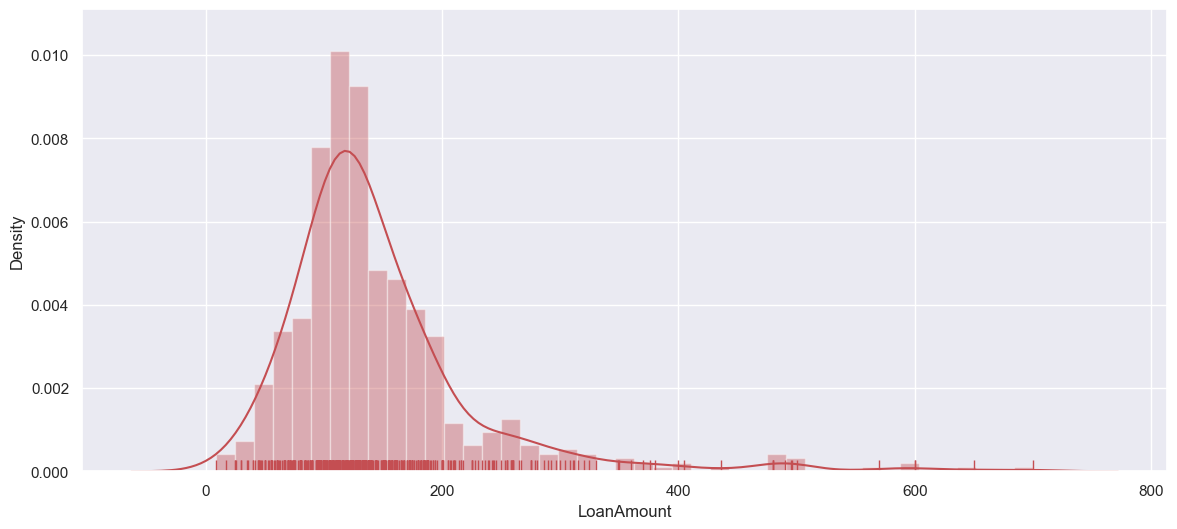

In [412]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')

In [413]:
loan_train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [414]:
loan_train['LoanAmount'].isnull().sum()


22

In [415]:
loan_train[loan_train['LoanAmount'].isnull()]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,1,1,0,1,0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,1,1,1,1,1,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,1,1,1,1,0,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,1,1,0,1,0,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,0,0,1,1,1,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,1,0,0,1,0,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,1,1,3,0,0,3992,0.0,NaN,180.0,1.0,Urban,N


In [416]:
loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


For yes in Loan_Status, average LoanAmount is 151.22 and no in Loan_Status, average LoanAmount is 144.29.

In [417]:
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

In [418]:
loan_train = LoanAmount_null_values_filler(loan_train)


In [419]:
loan_train['Loan_Amount_Term'].describe()


count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [420]:
loan_train['Loan_Amount_Term'].isnull().sum()


14

In [421]:
loan_train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

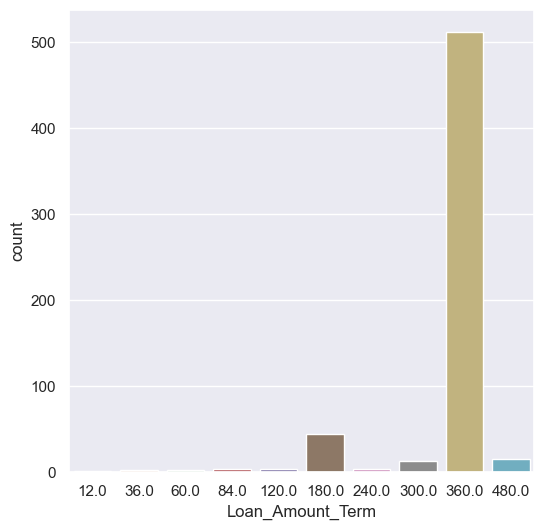

In [422]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Amount_Term', data = loan_train)
# plt.savefig('../images/term_counts.png')
plt.show()

In [423]:
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,1,1,0,1,0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,1,1,0,1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,1,1,0,0,1,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,0,0,0,1,0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,1,1,3,0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,1,1,0,0,0,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,1,1,0,1,0,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,0,0,0,0,0,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,1,1,0,1,0,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,1,0,0,0,0,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [424]:
loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']


Loan_Status,N,Y
count,186.000000,414.000000
mean,344.064516,341.072464
std,69.238921,63.247770
min,36.000000,12.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


In [425]:
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

11. Credit_History


In [426]:
loan_train['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [427]:
loan_train['Credit_History'].isnull().sum()


50

In [428]:
loan_train['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [429]:
loan_train[loan_train['Credit_History'].isnull()]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,1,0,1,0,0,3596,0.0,100.00,240.0,NaN,Urban,Y
24,LP001052,1,1,1,1,0,3717,2925.0,151.00,360.0,NaN,Semiurban,N
30,LP001091,1,1,1,1,0,4166,3369.0,201.00,360.0,NaN,Urban,N
42,LP001123,1,1,0,1,0,2400,0.0,75.00,360.0,NaN,Urban,Y
79,LP001264,1,1,3,0,1,3333,2166.0,130.00,360.0,NaN,Semiurban,Y
83,LP001273,1,1,0,1,0,6000,2250.0,265.00,360.0,NaN,Semiurban,N
86,LP001280,1,1,2,0,0,3333,2000.0,99.00,360.0,NaN,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,144.29,360.0,NaN,Urban,N
117,LP001405,1,1,1,1,0,2214,1398.0,85.00,360.0,NaN,Urban,Y
125,LP001443,0,0,0,1,0,3692,0.0,93.00,360.0,NaN,Rural,Y


In [430]:
loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,179.000000,385.000000
mean,0.541899,0.981818
std,0.499639,0.133782
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


เนื่องจากผู้สมัคร 78 % มี Credit_History เราจึงสามารถเติมค่า Null ด้วย 1.0

In [431]:
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)

12. Property_Area

In [432]:
loan_train['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [433]:
loan_train['Property_Area'].isnull().sum()

0

In [434]:
loan_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [435]:
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [436]:
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']
loan_train['Property_Area_Urban'] = Property_Area_Dummies['Urban']

In [437]:
loan_train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [438]:
loan_train.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area               object
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

# Feature Selection

In [439]:
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [440]:
loan_train.drop('Loan_ID', axis = 1, inplace = True)

# Detecting Outliers

In [441]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

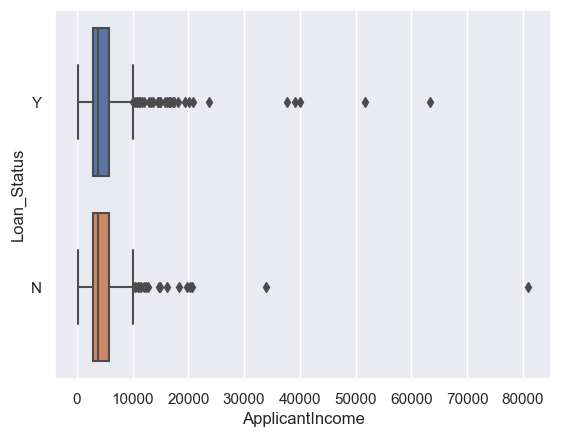

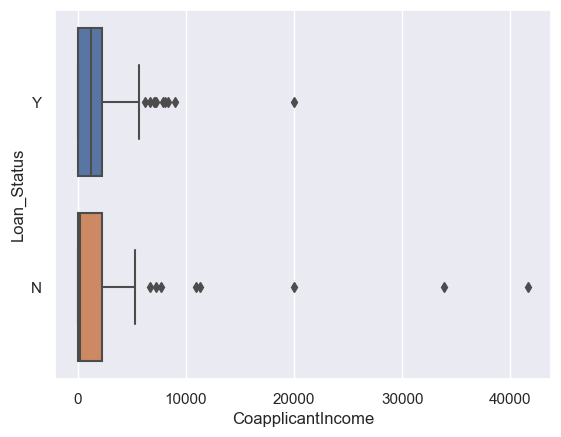

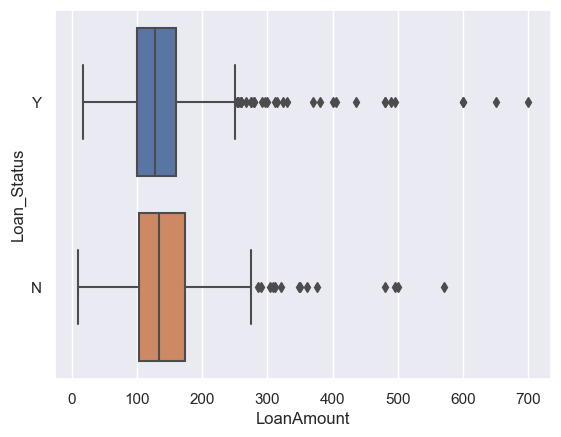

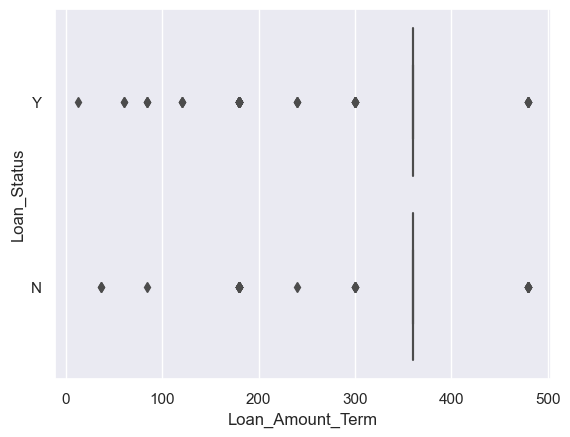

In [442]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()

In [443]:
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
155,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y,0,1,0
171,0,1,3,1,0,51763,0.0,700.0,300.0,1.0,Urban,Y,0,0,1
183,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N,0,1,0
185,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,0,1,0
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y,0,0,1
409,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N,1,0,0
443,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Semiurban,Y,0,1,0


In [444]:
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
402,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,0,1,0
417,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,Urban,N,0,0,1
581,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,Urban,N,0,0,1
600,0,0,3,1,0,416,41667.0,350.0,180.0,1.0,Urban,N,0,0,1


In [445]:
loan_train[loan_train['LoanAmount'] > 400]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
130,1,0,0,1,1,20166,0.0,650.0,480.0,1.0,Urban,Y,0,0,1
155,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y,0,1,0
171,0,1,3,1,0,51763,0.0,700.0,300.0,1.0,Urban,Y,0,0,1
177,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,Semiurban,N,0,1,0
278,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,Semiurban,Y,0,1,0
308,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N,1,0,0
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y,0,0,1
369,1,1,0,1,0,19730,5266.0,570.0,360.0,1.0,Rural,N,1,0,0
432,1,0,0,1,0,12876,0.0,405.0,360.0,1.0,Semiurban,Y,0,1,0
487,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,Urban,N,0,0,1


# Feature Observation

In [446]:
train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13,14, 10]]
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area
0,1,0,0,1,0,5849,0.0,151.22,360.0,1.0,Y,0,0,1,Urban
1,1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,N,1,0,0,Rural
2,1,1,0,1,1,3000,0.0,66.00,360.0,1.0,Y,0,0,1,Urban
3,1,1,0,0,0,2583,2358.0,120.00,360.0,1.0,Y,0,0,1,Urban
4,1,0,0,1,0,6000,0.0,141.00,360.0,1.0,Y,0,0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.00,360.0,1.0,Y,1,0,0,Rural
610,1,1,3,1,0,4106,0.0,40.00,180.0,1.0,Y,1,0,0,Rural
611,1,1,1,1,0,8072,240.0,253.00,360.0,1.0,Y,0,0,1,Urban
612,1,1,2,1,0,7583,0.0,187.00,360.0,1.0,Y,0,0,1,Urban


In [447]:
train_corr = train.corr()
train_corr

C:\Users\tam05\AppData\Local\Temp\ipykernel_22988\2424225176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.336818,0.154158,-0.061497,-0.027421,0.013933,0.082316,0.064535,-0.070288,0.021612,0.075128,-0.113069,0.044109
Married,0.336818,1.000000,0.348717,-0.012304,0.004489,0.051708,0.075948,0.147312,-0.100912,0.010938,-0.006805,0.005845,0.000546
Dependents,0.154158,0.348717,1.000000,-0.062281,0.059584,0.119616,0.029628,0.162308,-0.099456,-0.046815,-0.005126,0.004692,0.000112
Education,-0.061497,-0.012304,-0.062281,1.000000,0.010383,0.140760,0.062290,0.167342,0.073928,0.073658,-0.077520,0.039410,0.034279
Self_Employed,-0.027421,0.004489,0.059584,0.010383,1.000000,0.127180,-0.016100,0.115458,-0.033739,-0.001550,0.022065,0.008710,-0.030338
ApplicantIncome,0.013933,0.051708,0.119616,0.140760,0.127180,1.000000,-0.116605,0.565583,-0.046531,-0.018615,0.015829,-0.014246,-0.000598
CoapplicantIncome,0.082316,0.075948,0.029628,0.062290,-0.016100,-0.116605,1.000000,0.187749,-0.059383,0.011134,0.005329,-0.027044,0.022776
LoanAmount,0.064535,0.147312,0.162308,0.167342,0.115458,0.565583,0.187749,1.000000,0.036687,-0.000727,0.043153,-0.008037,-0.033440
Loan_Amount_Term,-0.070288,-0.100912,-0.099456,0.073928,-0.033739,-0.046531,-0.059383,0.036687,1.000000,-0.004705,0.034321,0.059141,-0.094279
Credit_History,0.021612,0.010938,-0.046815,0.073658,-0.001550,-0.018615,0.011134,-0.000727,-0.004705,1.000000,-0.020906,0.035976,-0.016934


<AxesSubplot: >

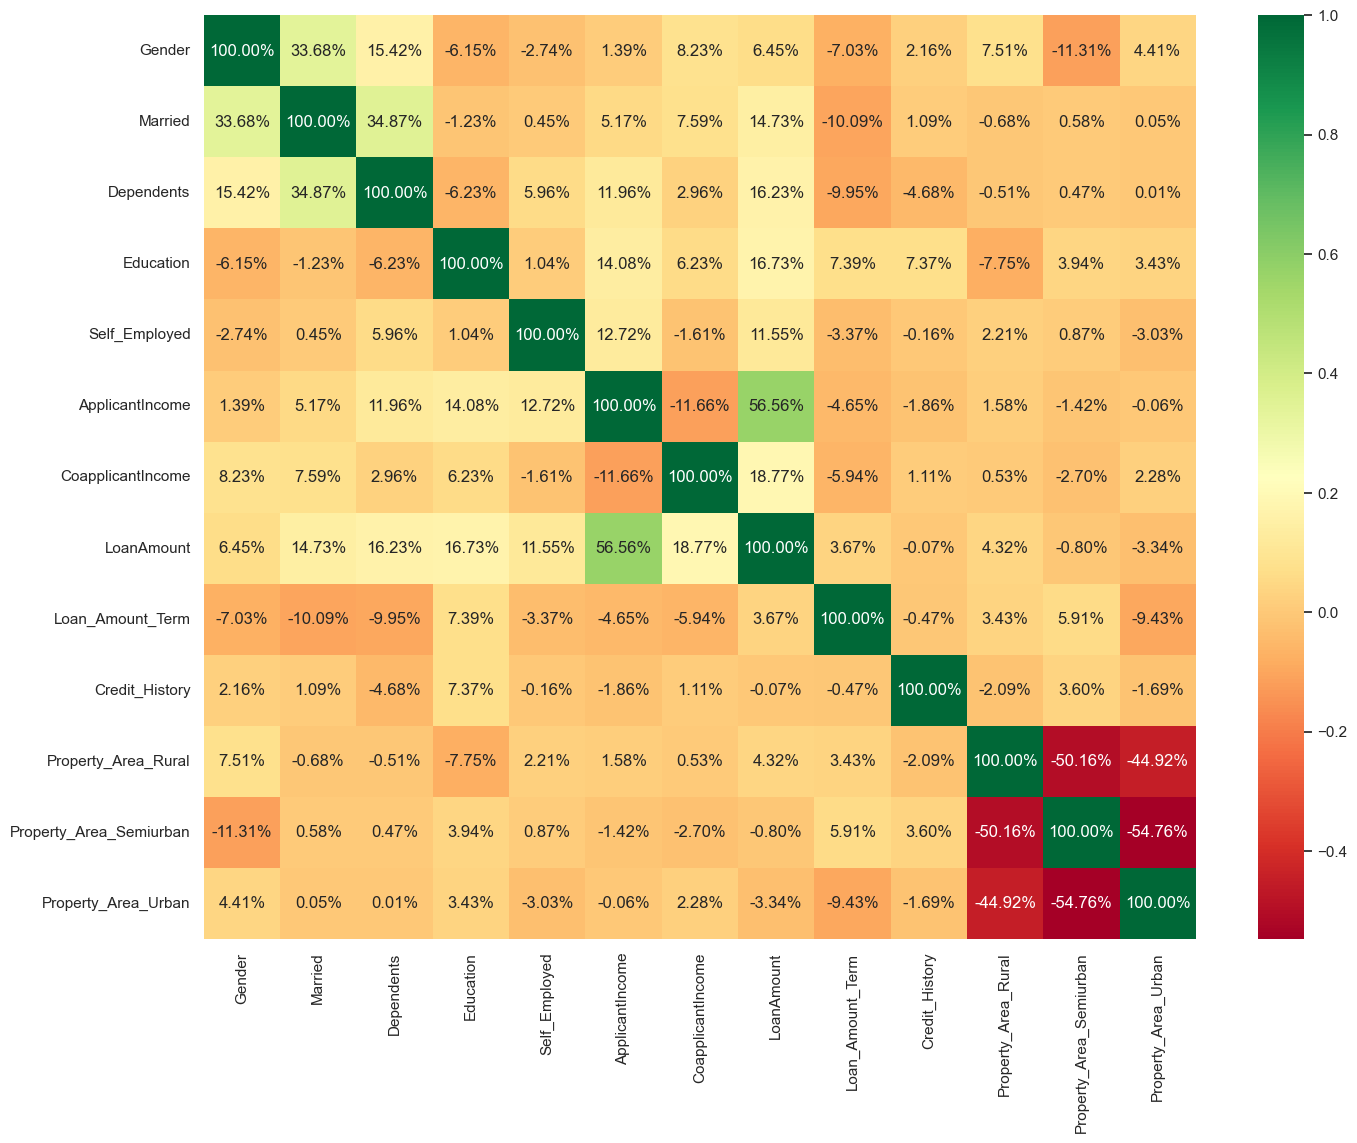

In [448]:
plt.figure(figsize = (16, 12))
sb.heatmap(train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
# plt.savefig('../images/correlation_of_features.png')

In [449]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [450]:
corr_with_loan_status = train.corrwith(train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

C:\Users\tam05\AppData\Local\Temp\ipykernel_22988\847779248.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_loan_status = train.corrwith(train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))


Gender                     0.025407
Married                    0.091478
Dependents                 0.008204
Education                  0.085884
Self_Employed             -0.003700
ApplicantIncome           -0.004710
CoapplicantIncome         -0.059187
LoanAmount                -0.035052
Loan_Amount_Term          -0.022549
Credit_History             0.540556
Property_Area_Rural       -0.100694
Property_Area_Semiurban    0.136540
Property_Area_Urban       -0.043621
dtype: float64

<AxesSubplot: >

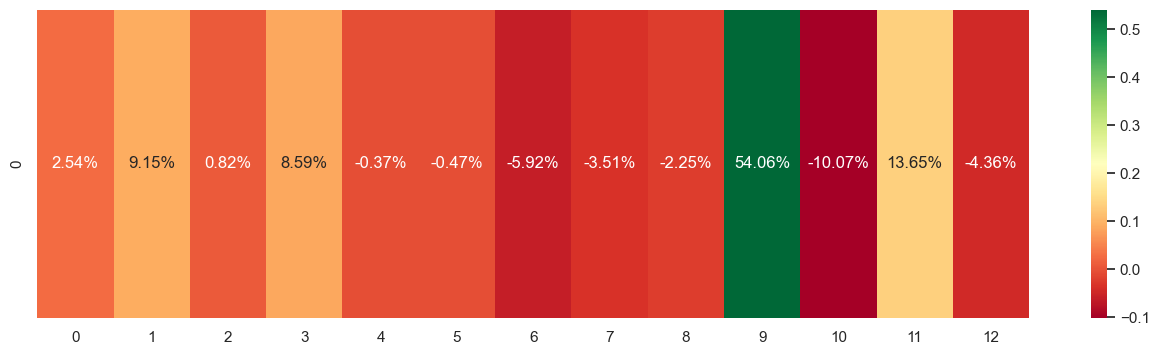

In [451]:
plt.figure(figsize = (16, 4))
sb.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
# plt.savefig('../images/correlation_of_features_with_loan_status.png')

Credit_History is having more correlation with Loan_Status

<Figure size 1200x600 with 0 Axes>

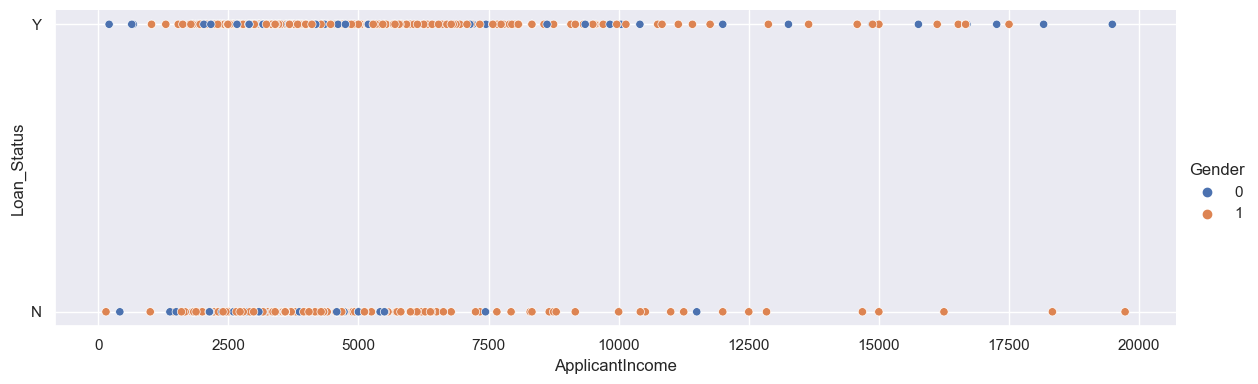

In [452]:
plt.figure(figsize = (12, 6))
sb.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = train[train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

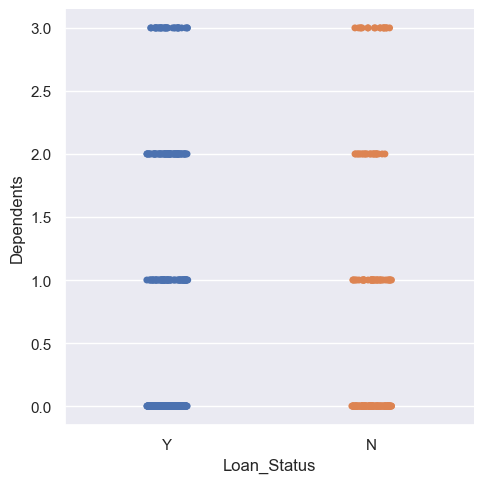

In [453]:
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = train)


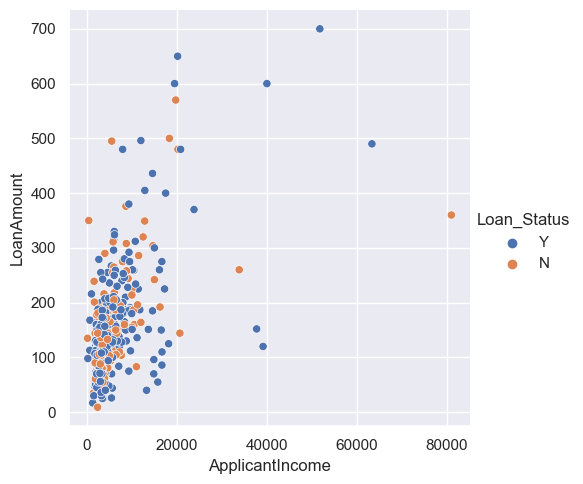

In [454]:
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = train, hue = 'Loan_Status')

มีความสัมพันธ์ระหว่าง LoanAmount และรายได้ของผู้สมัคร แต่ไม่ได้จัดประเภท Loan_Status

In [455]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area
0,1,0,0,1,0,5849,0.0,151.22,360.0,1.0,Y,0,0,1,Urban
1,1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,N,1,0,0,Rural
2,1,1,0,1,1,3000,0.0,66.00,360.0,1.0,Y,0,0,1,Urban
3,1,1,0,0,0,2583,2358.0,120.00,360.0,1.0,Y,0,0,1,Urban
4,1,0,0,1,0,6000,0.0,141.00,360.0,1.0,Y,0,0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.00,360.0,1.0,Y,1,0,0,Rural
610,1,1,3,1,0,4106,0.0,40.00,180.0,1.0,Y,1,0,0,Rural
611,1,1,1,1,0,8072,240.0,253.00,360.0,1.0,Y,0,0,1,Urban
612,1,1,2,1,0,7583,0.0,187.00,360.0,1.0,Y,0,0,1,Urban


In [456]:
train = train.drop(columns=['Property_Area'])

In [457]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    object 
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(6), o

In [458]:
y = train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
train1 = train.drop('Loan_Status', axis=1)
x = train1.values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = train.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                      2.230430
Married                     2.134860
Dependents                  6.283890
Education                   2.488179
Self_Employed               2.453661
ApplicantIncome            18.331731
CoapplicantIncome          11.815550
LoanAmount                 18.697825
Loan_Amount_Term            5.045145
Credit_History             27.226241
Loan_Status                 1.086416
Property_Area_Rural         1.440931
Property_Area_Semiurban     0.765140
dtype: float64

In [459]:
train1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,151.22,360.0,1.0,0,0,1
1,1,1,1,1,0,4583,1508.0,128.00,360.0,1.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.00,360.0,1.0,0,0,1
3,1,1,0,0,0,2583,2358.0,120.00,360.0,1.0,0,0,1
4,1,0,0,1,0,6000,0.0,141.00,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.00,360.0,1.0,1,0,0
610,1,1,3,1,0,4106,0.0,40.00,180.0,1.0,1,0,0
611,1,1,1,1,0,8072,240.0,253.00,360.0,1.0,0,0,1
612,1,1,2,1,0,7583,0.0,187.00,360.0,1.0,0,0,1


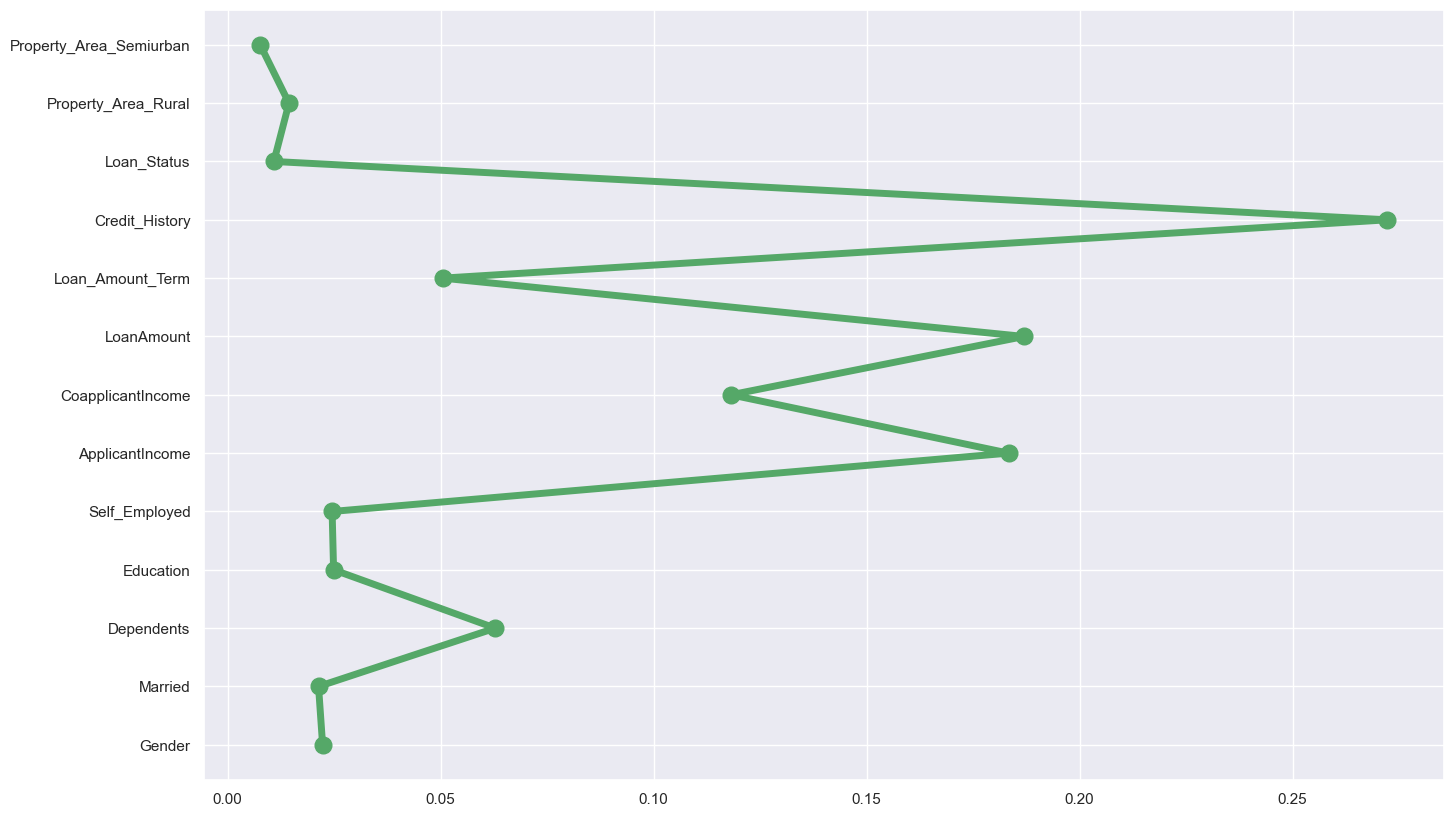

In [460]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, train.columns[:-1], 'g-o', linewidth=5, markersize=12)
# plt.savefig("../images/feature_importances.png")

From the above plot, Credit_History (28 %) has more importance, and than Loan Amount and Applicant Income and then Co-applicant Income


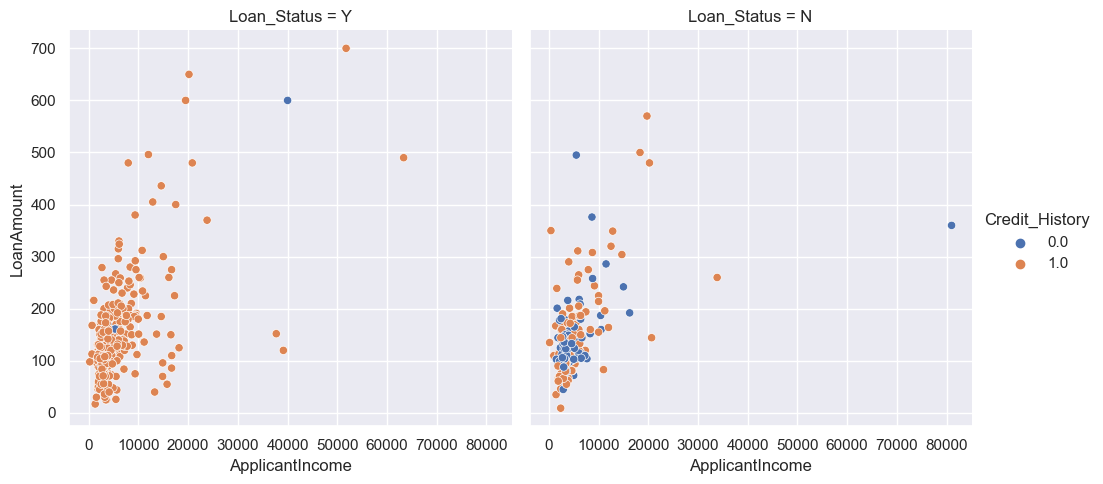

In [461]:
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = train, hue = 'Credit_History', col = 'Loan_Status')

From the above plot:
- The applicants who are all having a credit history mostly get the Loan Amount. 
- From this, Credit History is the major feature.

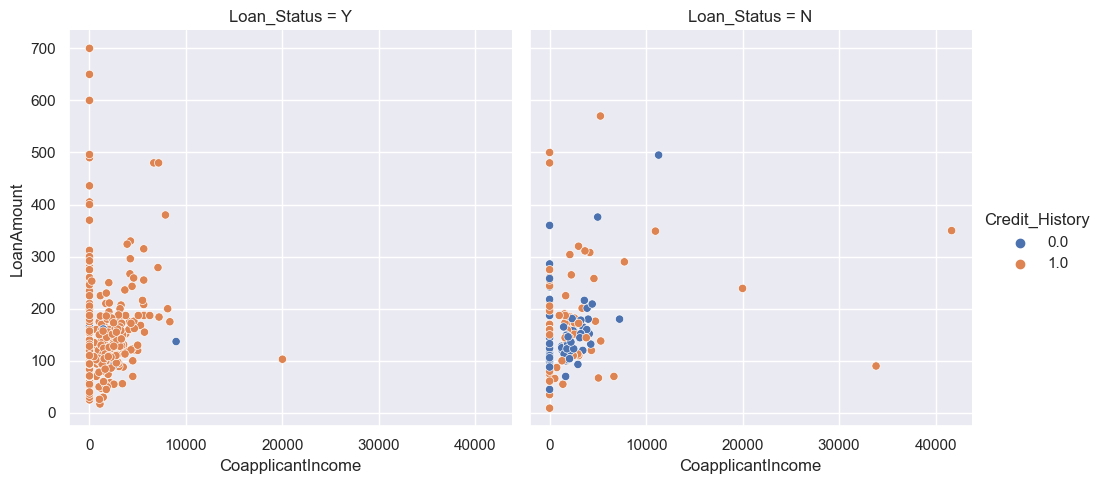

In [462]:
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = train,hue = 'Credit_History', col = 'Loan_Status')

Most of the Co-applicants are not having income

# Feature Selection

In [463]:
prediction_features = pd.Series(etc.feature_importances_*100, index = train.columns[:-1]).sort_values(ascending = False)

In [464]:
prediction_features = prediction_features.index

In [465]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

# Model Building

In [466]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [467]:
X = feature_columns.values
y = prediction_column.values

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [469]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 5), (123, 5), (491,), (123,))

## Logistic Regresion with Model Performance

Simple Logistic Regression

In [470]:
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 80.04073319755601%
Testing Accuracy  : 86.1788617886179%


In [471]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

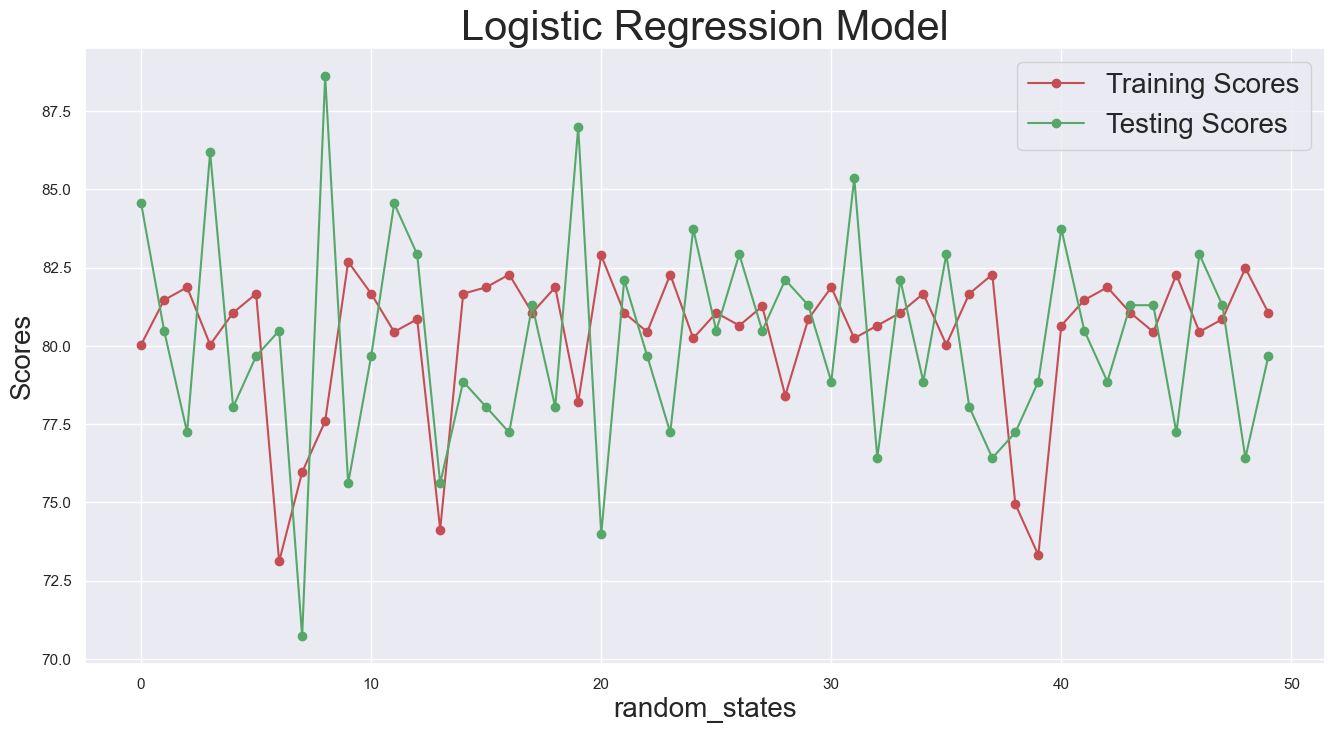

In [472]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
# plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

Logistic Regression with Standard Scaling and PCA

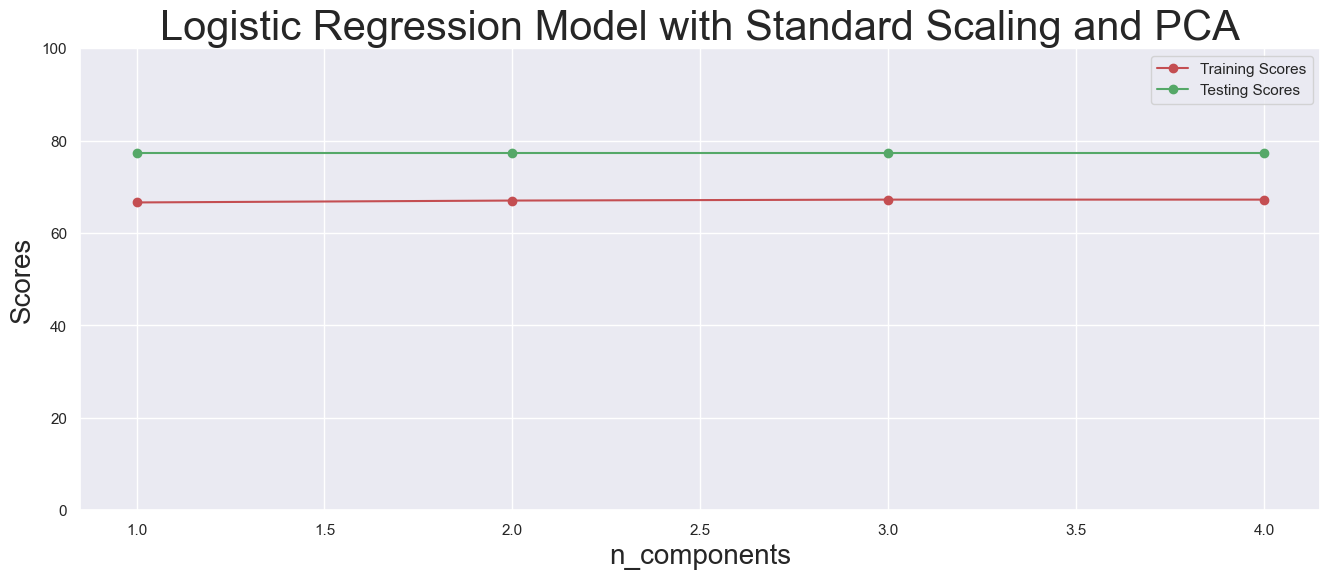

In [474]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
#     standard_scaler = StandardScaler()
#     # Scaling training samples
#     scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
#     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

# Decision Tree Classifier with Model Performance


Simple Decision Tree Classifier

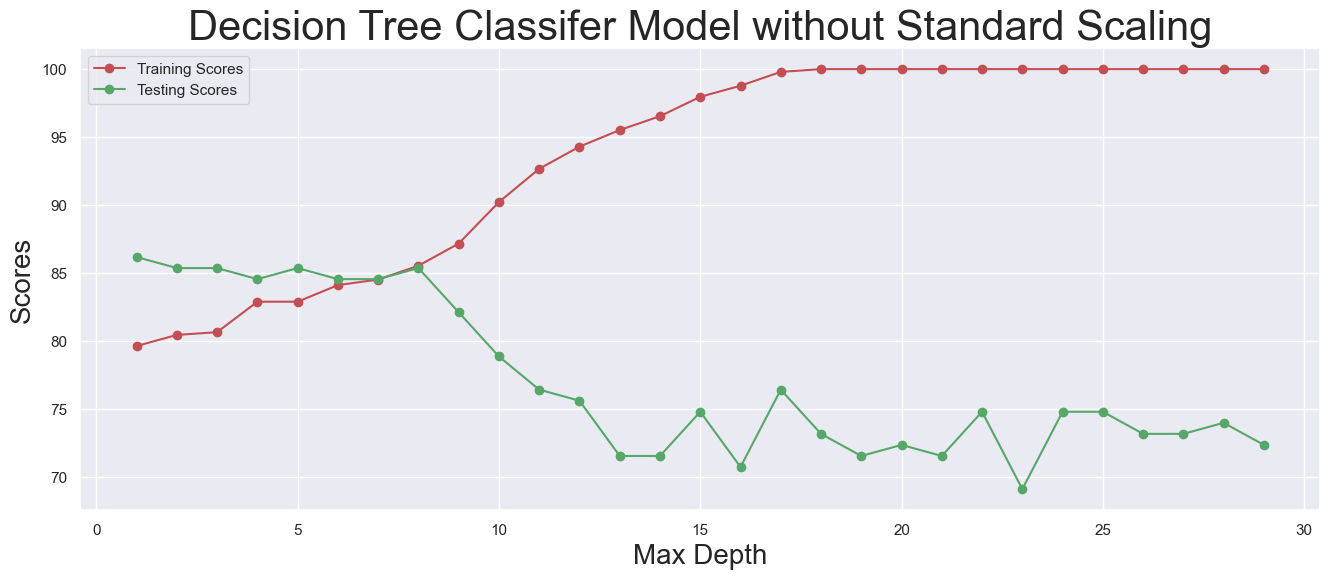

In [475]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
# plt.savefig('../images/decision_tree_classifier_model_performance.png') 
plt.show()

In [476]:
for scores in zip(training_scores, testing_scores, abs(np.array(training_scores) - np.array(testing_scores))):
    print(scores)

(79.63340122199592, 86.1788617886179, 6.545460566621969)
(80.44806517311609, 85.36585365853658, 4.917788485420488)
(80.65173116089613, 85.36585365853658, 4.714122497640446)
(82.89205702647658, 84.5528455284553, 1.6607885019787147)
(82.89205702647658, 85.36585365853658, 2.473796632060001)
(84.11405295315683, 84.5528455284553, 0.43879257529846427)
(84.5213849287169, 84.5528455284553, 0.03146059973839499)
(85.5397148676171, 85.36585365853658, 0.1738612090805276)
(87.16904276985743, 82.11382113821138, 5.055221631646049)
(90.22403258655804, 78.86178861788618, 11.362243968671862)
(92.66802443991853, 76.42276422764228, 16.24526021227625)
(94.29735234215886, 75.60975609756098, 18.687596244597884)
(95.5193482688391, 71.54471544715447, 23.974632821684622)
(96.5376782077393, 71.54471544715447, 24.99296276058483)
(97.9633401221996, 74.79674796747967, 23.166592154719922)
(98.77800407331976, 70.73170731707317, 28.04629675624659)
(99.79633401221996, 76.42276422764228, 23.373569784577683)
(100.0, 73.1

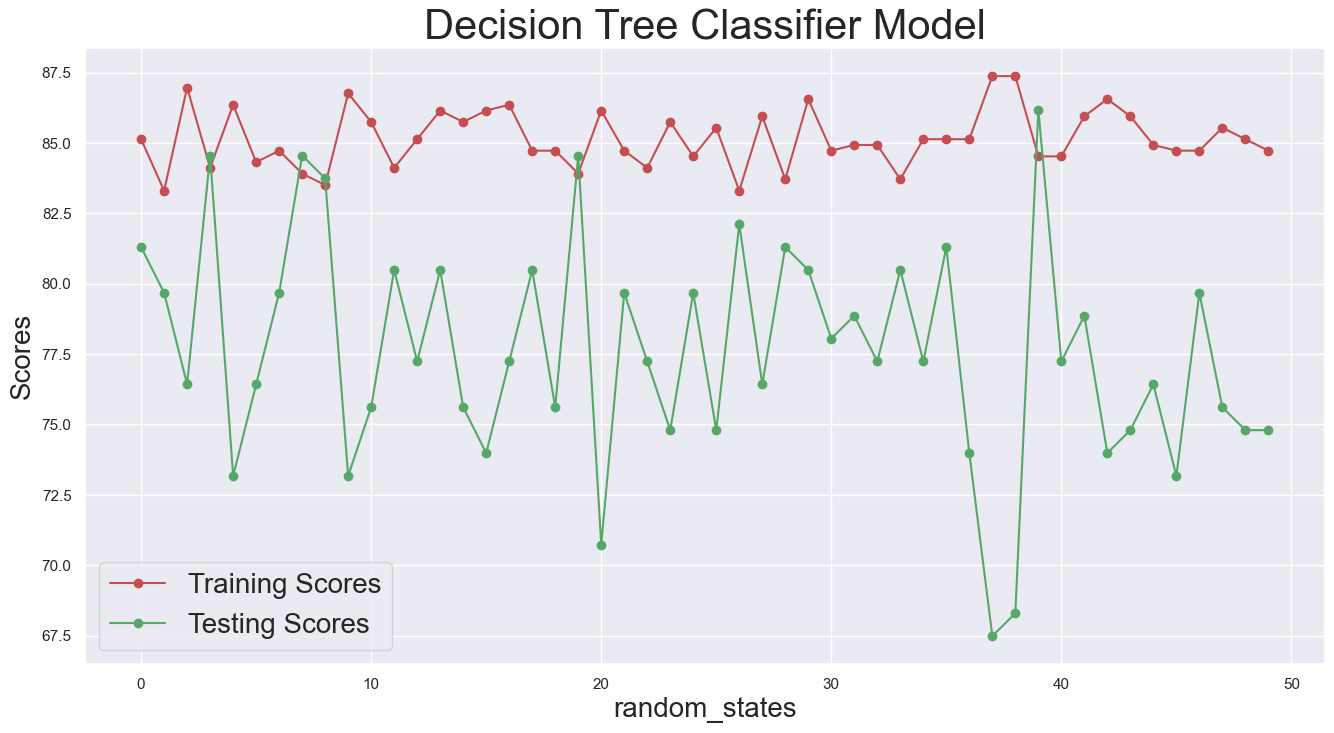

In [477]:
train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 6)
    decision_tree_model.fit(X_train, y_train)
    
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100
    
    decision_tree_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
# plt.savefig('../images/decision_tree_model_performance.png')
plt.show()

Decision Tree Classifier with Standard Scaling

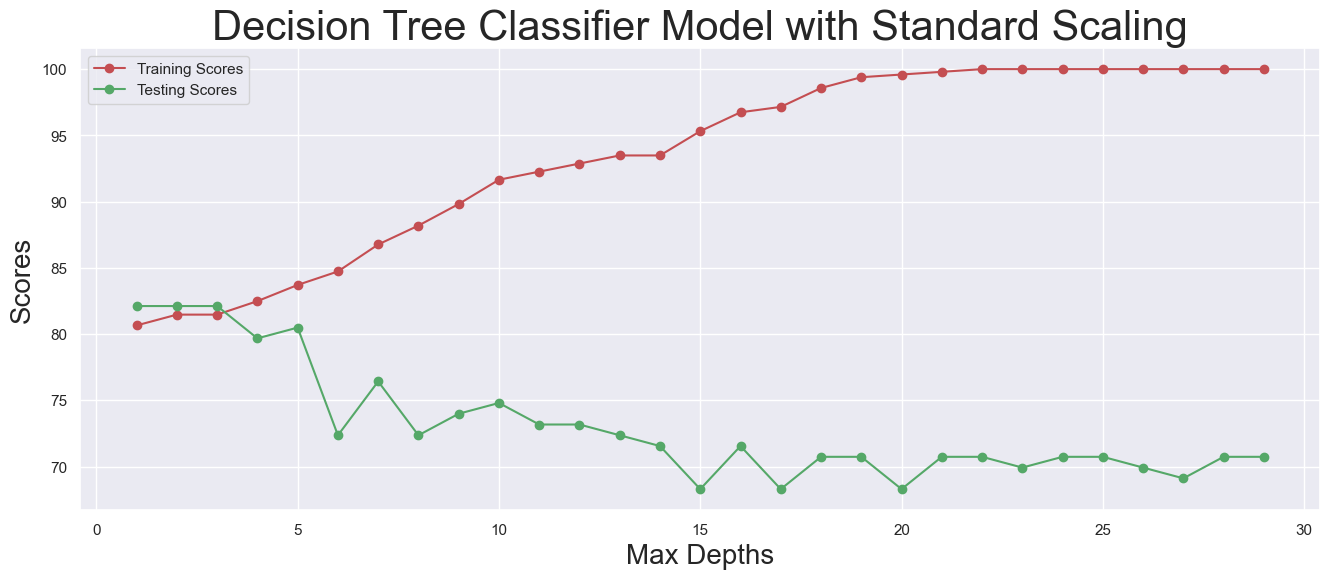

In [478]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
    
    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

In [479]:
for scores in zip(training_scores, testing_scores):
    print(scores)

(80.65173116089613, 82.11382113821138)
(81.4663951120163, 82.11382113821138)
(81.4663951120163, 82.11382113821138)
(82.4847250509165, 79.67479674796748)
(83.70672097759673, 80.48780487804879)
(84.72505091649694, 72.35772357723577)
(86.76171079429736, 76.42276422764228)
(88.18737270875764, 72.35772357723577)
(89.81670061099797, 73.98373983739837)
(91.64969450101833, 74.79674796747967)
(92.26069246435846, 73.17073170731707)
(92.87169042769857, 73.17073170731707)
(93.48268839103869, 72.35772357723577)
(93.48268839103869, 71.54471544715447)
(95.31568228105907, 68.29268292682927)
(96.74134419551935, 71.54471544715447)
(97.14867617107943, 68.29268292682927)
(98.57433808553971, 70.73170731707317)
(99.38900203665987, 70.73170731707317)
(99.59266802443992, 68.29268292682927)
(99.79633401221996, 70.73170731707317)
(100.0, 70.73170731707317)
(100.0, 69.91869918699187)
(100.0, 70.73170731707317)
(100.0, 70.73170731707317)
(100.0, 69.91869918699187)
(100.0, 69.10569105691057)
(100.0, 70.73170731707

For max_depth = 8, we get a Training Accuracy of 85.74% and a Testing Accuracy of 85.36%

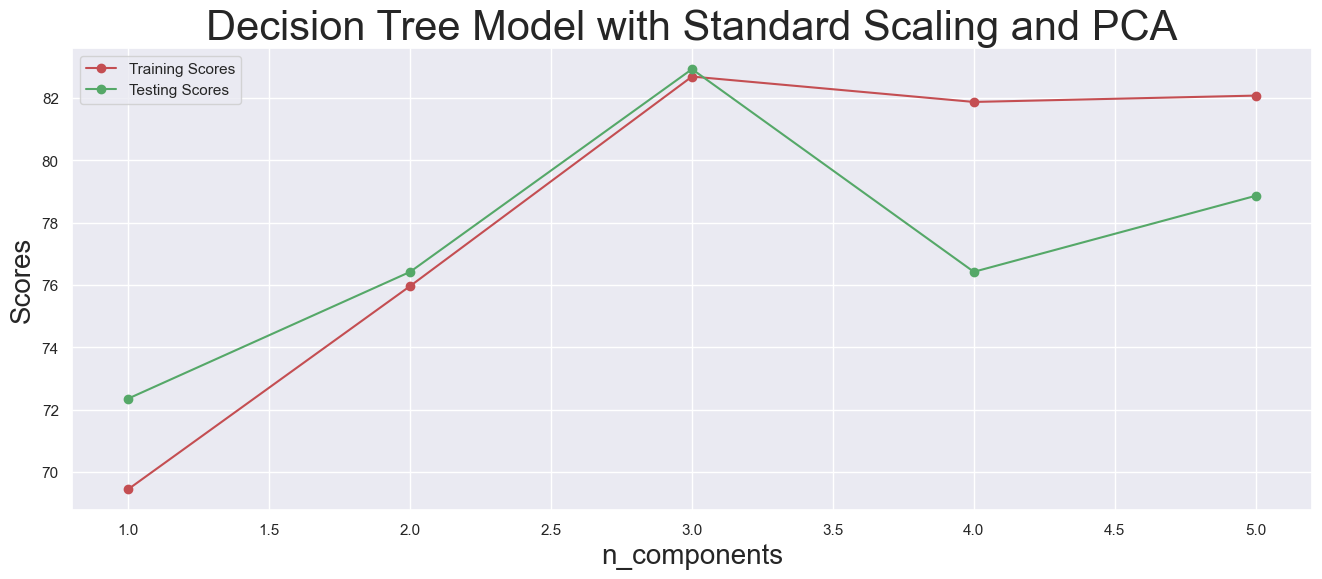

Max_Depth :  3
(69.4501018329939, 72.35772357723577)
(75.96741344195519, 76.42276422764228)
(82.68839103869654, 82.92682926829268)
(81.87372708757637, 76.42276422764228)
(82.07739307535643, 78.86178861788618)


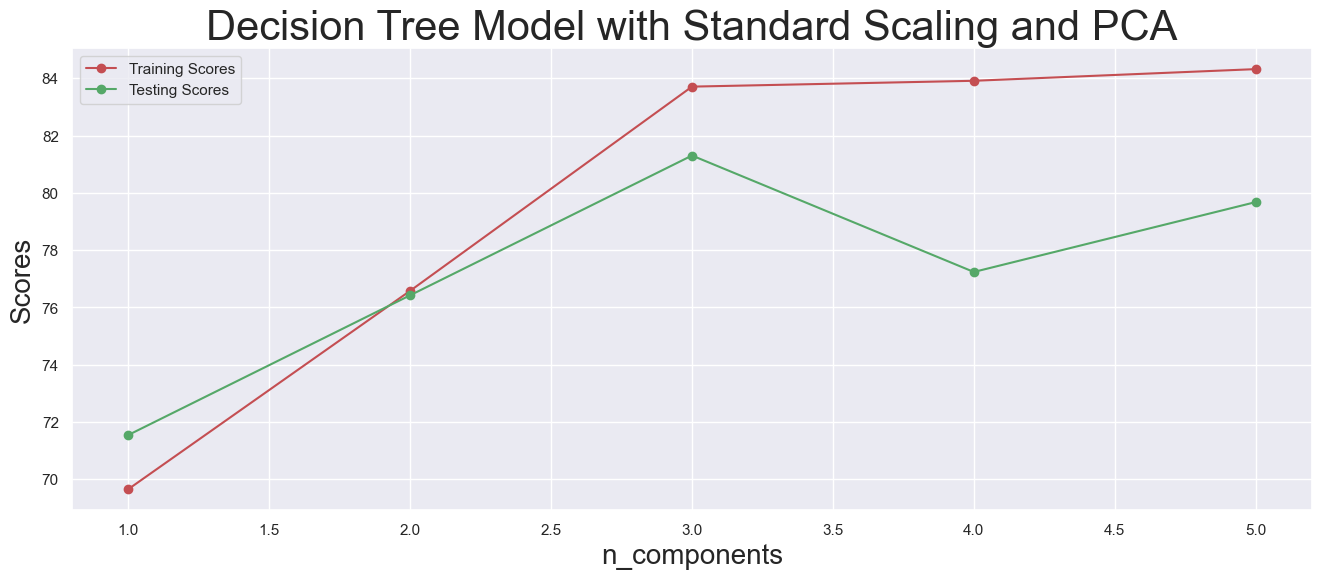

Max_Depth :  4
(69.65376782077392, 71.54471544715447)
(76.57841140529531, 76.42276422764228)
(83.70672097759673, 81.30081300813008)
(83.91038696537679, 77.23577235772358)
(84.31771894093686, 79.67479674796748)


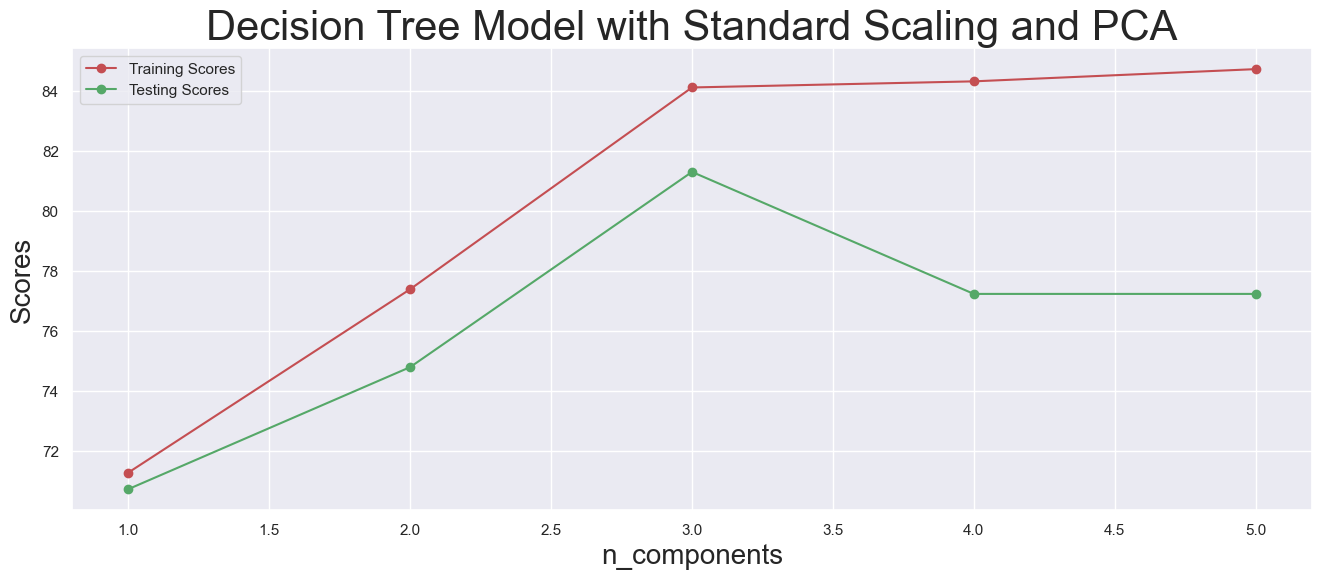

Max_Depth :  5
(71.28309572301426, 70.73170731707317)
(77.39307535641548, 74.79674796747967)
(84.11405295315683, 81.30081300813008)
(84.31771894093686, 77.23577235772358)
(84.72505091649694, 77.23577235772358)


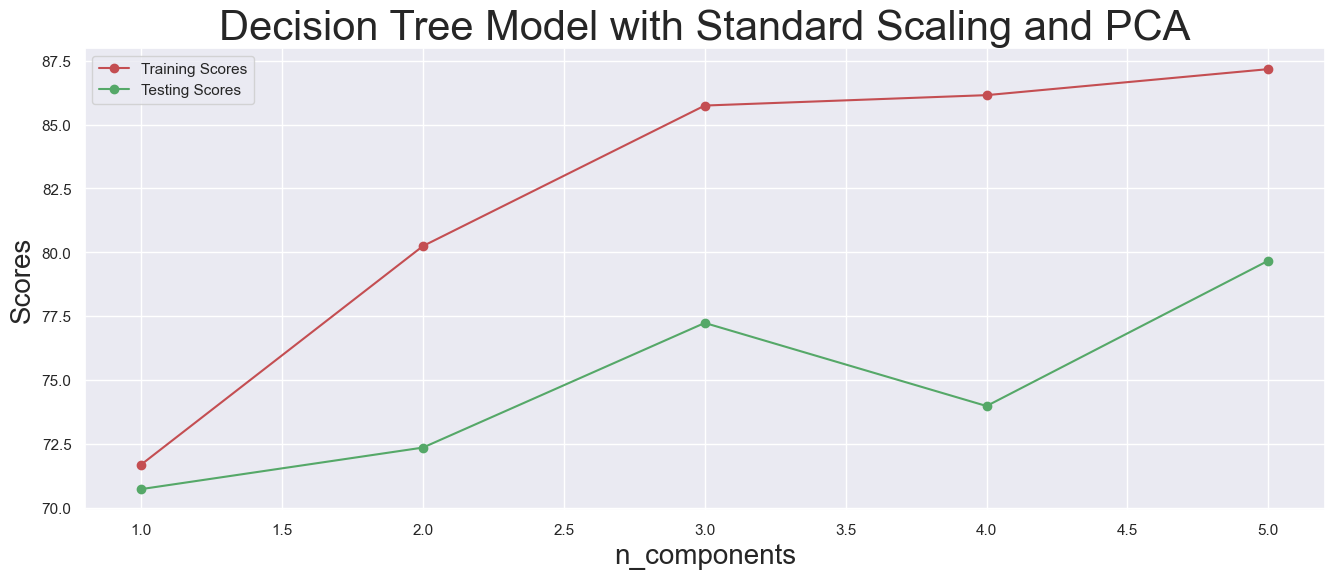

Max_Depth :  6
(71.69042769857434, 70.73170731707317)
(80.24439918533605, 72.35772357723577)
(85.74338085539715, 77.23577235772358)
(86.15071283095723, 73.98373983739837)
(87.16904276985743, 79.67479674796748)


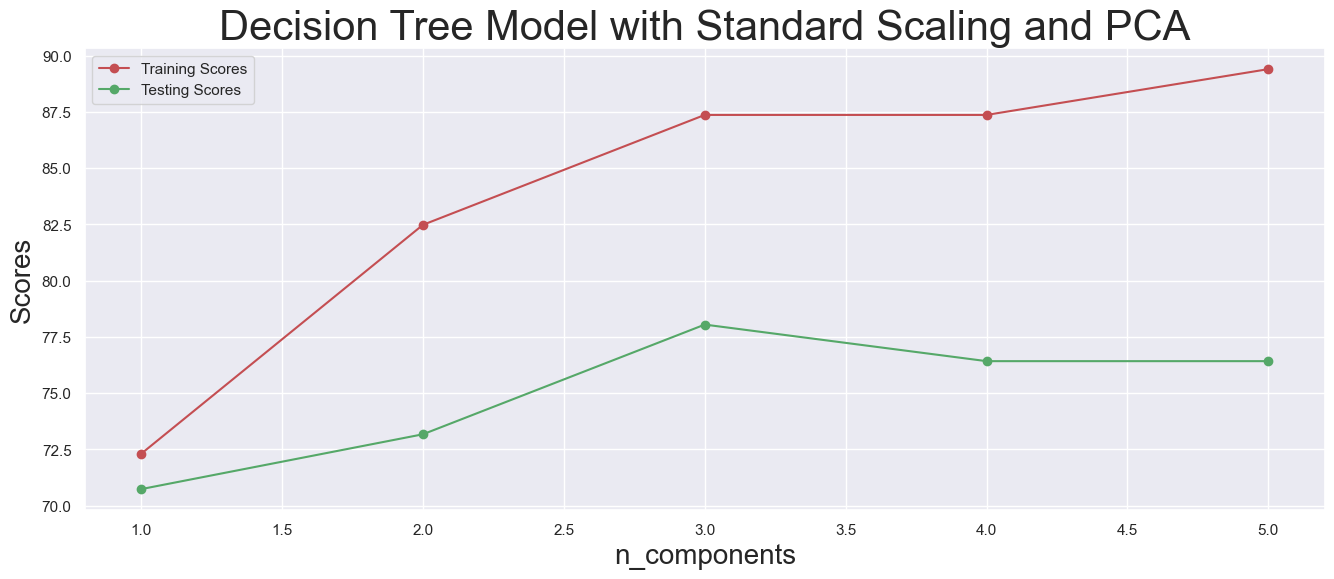

Max_Depth :  7
(72.30142566191446, 70.73170731707317)
(82.4847250509165, 73.17073170731707)
(87.37270875763747, 78.04878048780488)
(87.37270875763747, 76.42276422764228)
(89.40936863543789, 76.42276422764228)


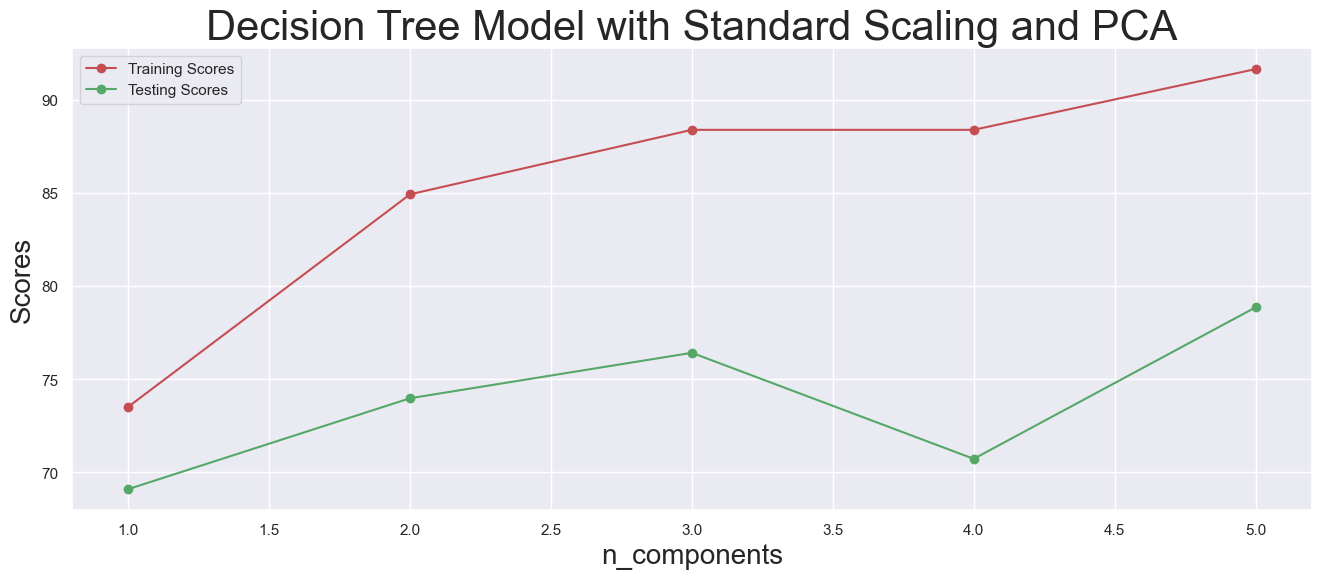

Max_Depth :  8
(73.5234215885947, 69.10569105691057)
(84.928716904277, 73.98373983739837)
(88.39103869653768, 76.42276422764228)
(88.39103869653768, 70.73170731707317)
(91.64969450101833, 78.86178861788618)


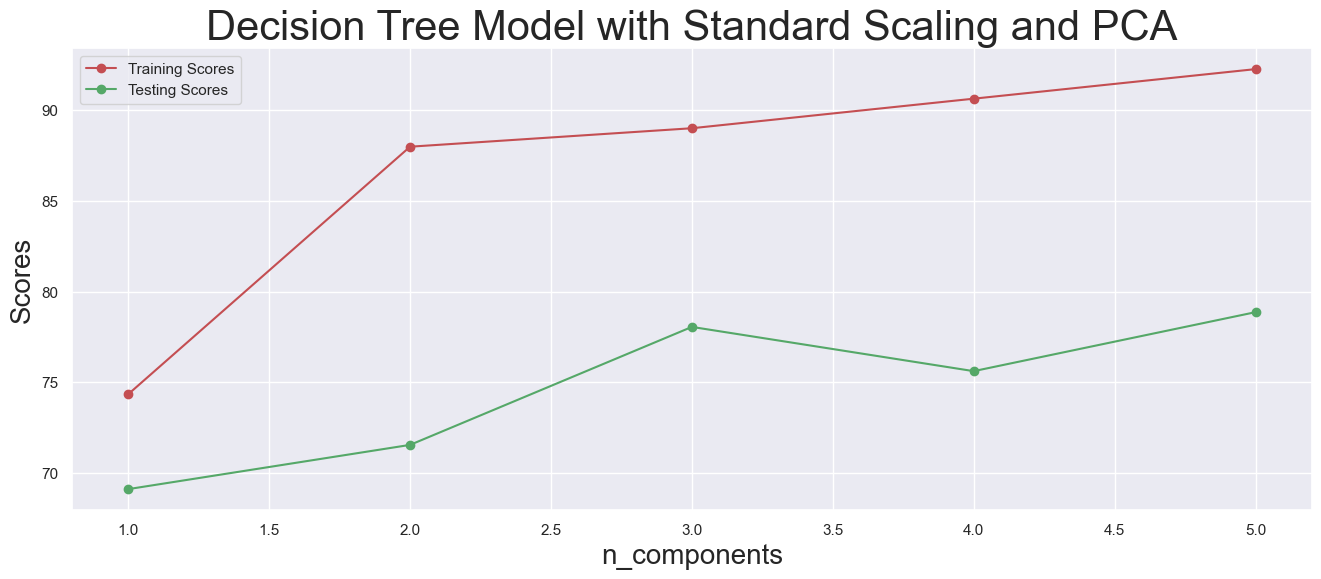

Max_Depth :  9
(74.33808553971487, 69.10569105691057)
(87.9837067209776, 71.54471544715447)
(89.0020366598778, 78.04878048780488)
(90.63136456211812, 75.60975609756098)
(92.26069246435846, 78.86178861788618)


In [480]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 85% and a Testing accuracy of 83%

# A Final overview of different kind of Model Based on their performance

Simple Logistic Regression Model without Standard Scaling and without PCA :
- Training Samples with random_state = 3
- Training Accuracy : 80.04073319755601%
- Testing Accuracy : 86.1788617886179%

Logistic Model with Standard Scaling and PCA :
- อย่า หา ทำ

Decision Tree Classifier Model without Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.53 %
- Testing Accuracy : 85.36 %

Decision Tree Classifier Model with Standard Scaling and without PCA :
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.74 %
- Testing Accuracy : 85.36 %

Decision Tree Classifier Model with Standard Scaling and with PCA :
- random_state = 3
- Max-Depth = 6
- n_components (PCA) = 5
- Training Accuracy : 84.92 %
- Testing Accuracy : 83.73 %

# Building Optimal Model with Decision Tree without Standard Scaling and without PCA

In [481]:
feature_values = feature_columns.values
prediction_values = train['Loan_Status'].values

In [482]:
decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values))

Score :  0.8534201954397395


In [483]:
import joblib
joblib.dump(decision_tree_model, 'decision_tree_model_feature_selection.pkl')

['decision_tree_model_feature_selection.pkl']

In [517]:
loan_test = pd.read_csv('C:/Loan/Dataset/test_Y3wMUE5_7gLdaTN.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [518]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [519]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents
0,1.0,110.0,5720,0,0
1,1.0,126.0,3076,1500,1
2,1.0,208.0,5000,1800,2
3,NaN,100.0,2340,2546,2
4,1.0,78.0,3276,0,0


In [520]:
loan_test.isnull().sum()

Credit_History       29
LoanAmount            5
ApplicantIncome       0
CoapplicantIncome     0
Dependents           10
dtype: int64

In [521]:
loan_test = loan_test.dropna(how = 'any')
loan_test.isnull().sum()


Credit_History       0
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
dtype: int64

In [522]:
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [523]:
type(loan_test)

pandas.core.frame.DataFrame

In [524]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [525]:
M = decision_tree_model.predict(loan_test.values)

ValueError: could not convert string to float: 'Y'

In [503]:
loan_test.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,110.0,5720,0,0,Y
1,1.0,126.0,3076,1500,1,Y
2,1.0,208.0,5000,1800,2,Y
4,1.0,78.0,3276,0,0,Y
5,1.0,152.0,2165,3422,0,Y


In [504]:
loan_test.Loan_Status_Predicted.value_counts()

Y    266
N     60
Name: Loan_Status_Predicted, dtype: int64

In [505]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 366
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Credit_History         326 non-null    float64
 1   LoanAmount             326 non-null    float64
 2   ApplicantIncome        326 non-null    int64  
 3   CoapplicantIncome      326 non-null    int64  
 4   Dependents             326 non-null    int64  
 5   Loan_Status_Predicted  326 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 17.8+ KB
